## Naive- Bayes classifier

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [113]:
# data loading
data = pd.read_csv('pacific.csv')
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
ID                  26137 non-null object
Name                26137 non-null object
Date                26137 non-null int64
Time                26137 non-null int64
Event               26137 non-null object
Status              26137 non-null object
Latitude            26137 non-null object
Longitude           26137 non-null object
Maximum Wind        26137 non-null int64
Minimum Pressure    26137 non-null int64
Low Wind NE         26137 non-null int64
Low Wind SE         26137 non-null int64
Low Wind SW         26137 non-null int64
Low Wind NW         26137 non-null int64
Moderate Wind NE    26137 non-null int64
Moderate Wind SE    26137 non-null int64
Moderate Wind SW    26137 non-null int64
Moderate Wind NW    26137 non-null int64
High Wind NE        26137 non-null int64
High Wind SE        26137 non-null int64
High Wind SW        26137 non-null int64
High Wind NW        2613

In [115]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,2.613700e+04,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,1.988908e+07,896.050427,48.949344,18.176225,-745.064851,-746.312125,-748.290929,-746.320542,-751.604622,-752.094923,-752.701917,-752.102957,-753.584382,-753.787160,-754.046945,-753.774534
std,1.688455e+05,672.008065,25.334450,996.896388,447.193480,444.883379,441.232953,444.939111,435.198872,434.303796,433.202389,434.291049,431.605766,431.239618,430.773515,431.263235
min,1.949061e+07,0.000000,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.976081e+07,0.000000,30.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.990081e+07,600.000000,45.000000,941.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,2.003092e+07,1200.000000,65.000000,1002.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


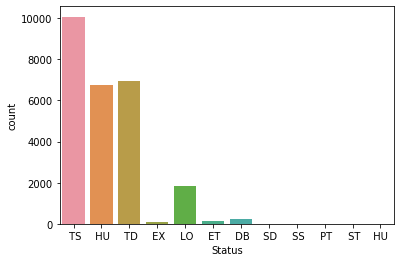

In [116]:
sns.countplot(data['Status'])

In [117]:
pre_columns = data[:]
pre_columns.drop(['ID','Name','Date','Time','Event','Status','Latitude','Longitude'],
                axis=1, inplace=True)
pre_columns.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [118]:
relevant_cols = pre_columns.columns
relevant_cols

Index(['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [119]:
## split the data in training and testing
train, test = train_test_split(data, test_size=0.3)
train_X = train[relevant_cols]
train_Y = train['Status']

test_X = test[relevant_cols]
test_Y = test['Status']

In [120]:
train_X.shape

(18295, 14)

In [121]:
train_Y.shape

(18295,)

In [122]:
test_X.shape

(7842, 14)

In [123]:
test_Y.shape

(7842,)

In [124]:
# use the Model
gnb = GaussianNB()

# train the model
gnb.fit(train_X, train_Y)

# prediction
predicted_gnb = gnb.predict(test_X)

# testing the predicted values
accuracy_score(test_Y, predicted_gnb)


0.3082121907676613